In [ ]:
import numpy as np
!pip install utils
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline
import pandas as pd

In [ ]:
data = pd.read_csv("/content/ex1data1.txt", delimiter=',',header=0)
data_2 = pd.read_csv("/content/ex1data2.txt", delimiter=',',header=0)

FileNotFoundError: ignored

In [ ]:
train=np.array([data])
test=np.array([data_2])

In [ ]:
data


In [ ]:
x=data['6.1101']
y=data['17.592']

In [ ]:
plt.scatter(x, y, marker='x', c='r')

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

In [ ]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  total_cost = 0
  cost=0
  for i in range(m):
    f_wb = w*x[i]+b
    cost+=(f_wb-y[i])**2
  total_cost=cost/(2*m)
  return total_cost

In [ ]:
initial_w = 2
initial_b = 1

cost = compute_cost(x, y, initial_w, initial_b)

NameError: ignored

In [ ]:
def compute_gradient(x, y, w, b):
  m=x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb=x[i]*w+b
    dj_db+=f_wb-y[i]
    dj_dw+=(f_wb-y[i])*x[i]


  dj_dw/=m
  dj_db/=m


  return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w, b )

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history

In [ ]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x ,y, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     5.90   
Iteration  150: Cost     4.43   
Iteration  300: Cost     4.02   
Iteration  450: Cost     3.79   
Iteration  600: Cost     3.65   
Iteration  750: Cost     3.57   
Iteration  900: Cost     3.52   
Iteration 1050: Cost     3.50   
Iteration 1200: Cost     3.48   
Iteration 1350: Cost     3.47   
w,b found by gradient descent: 1.1849957023502022 -3.926439005456633


In [ ]:
m = x.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

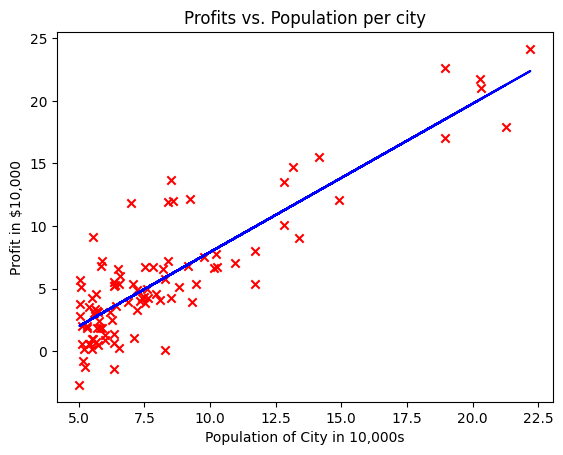

In [ ]:
plt.plot(x, predicted, c = "b")

plt.scatter(x, y, marker='x', c='r')

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')